In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The dataset includes 244 instances that regroup a data of two regions of Algeria, namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012.
The dataset includes 11 attributes and 1 output attribute (class)
The 244 instances have been classified into fire (138 classes) and not fire (106 classes) classes.

In [2]:
df=pd.read_csv("C:\Algerian-Forest-Fires-Classification\data\Algerian_forest_fires_dataset.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


In [4]:
print(df.shape)
df.isnull().sum()

(247, 14)


day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
dtype: int64

In [5]:
dat_numm_row=df[df["day"].isnull()]
dat_numm_row

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.iloc[121:126]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
121,30,9,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
125,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire


In [7]:
df['Region']='B'
df.loc[:121,'Region']='A'
df.iloc[121:126]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
121,30,9,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,A
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B
124,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,B
125,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,B


In [8]:
df.drop([122,123,124],inplace=True)
df.iloc[121:126]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
121,30,9,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,A
125,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,B
126,2,6,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,B
127,3,6,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire,B
128,4,6,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire,B


In [9]:
df = df.reset_index(drop=True)
print(df.shape)

(244, 15)


In [10]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
Region         0
dtype: int64

In [11]:
df.dropna(inplace=True)
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [12]:
print(df.shape)
df.head()


(243, 15)


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,A
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,A
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,A
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,A
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,A


### The columns 'day' and 'year' are not important beacuse 'year' columns is constant= 2012  along with these month also not important .Some of them think in Summer Season the Fires are more it's Perfectly fine but the columns "Temperature" and "Humidity" will represent the Hotness So removing 'month' does not affect the data

In [13]:
df.drop(columns=['day','year','month'],inplace=True)

In [14]:
num=[]
cat=[]
for i in df.columns:
    if df[i].dtype=='object':
        cat.append(i)
    else:
        num.append(i)

In [15]:
print("Numerical Columns:",num)
print("Categorical Columns:",cat)

Numerical Columns: []
Categorical Columns: ['Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region']


### Based on the above Separation all the columns comes under Categorical but it is False. And also White Spaces are exist between infront of the column Names

In [16]:
df.columns = df.columns.str.strip()
print(df.columns)

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region'],
      dtype='object')


In [17]:
# Loop through all columns
for col in df.columns:
    # Check if the column is of type 'object'
    if df[col].dtype == 'object':
        # Use .str.strip() to remove leading/trailing spaces
        df[col] = df[col].str.strip()

In [18]:
numeric_cols = [
    'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 
    'ISI', 'BUI', 'FWI'
]

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 243
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int64  
 1   RH           243 non-null    int64  
 2   Ws           243 non-null    int64  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    object 
 11  Region       243 non-null    object 
dtypes: float64(7), int64(3), object(2)
memory usage: 24.7+ KB


In [20]:
num=[]
cat=[]
for i in df.columns:
    if df[i].dtype=='object':
        cat.append(i)
    else:
        num.append(i)

In [21]:
print("Numerical Columns:",num)
print("Categorical Columns:",cat)

Numerical Columns: ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']
Categorical Columns: ['Classes', 'Region']


### Check How Numerical Columns are related to each Other

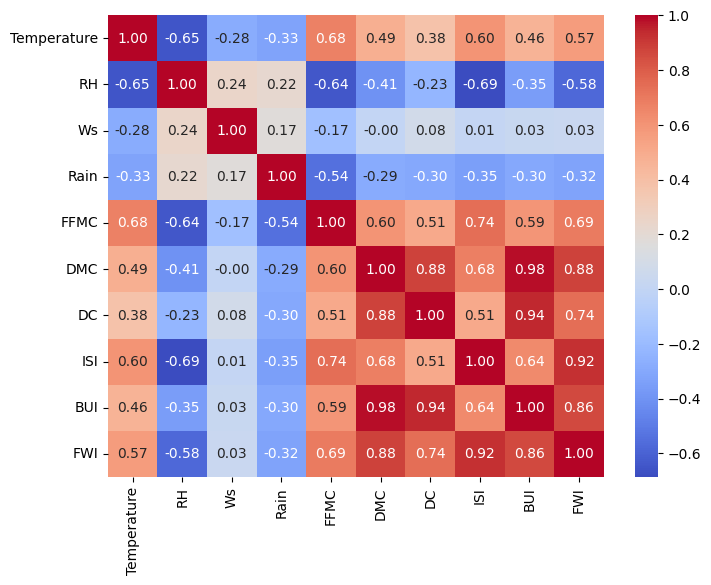

In [22]:
plt.figure(figsize=(8,6))
sns.heatmap(df[num].corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.show()

### Check the the dataset is Balanced or not


Classes
fire        137
not fire    106
Name: count, dtype: int64


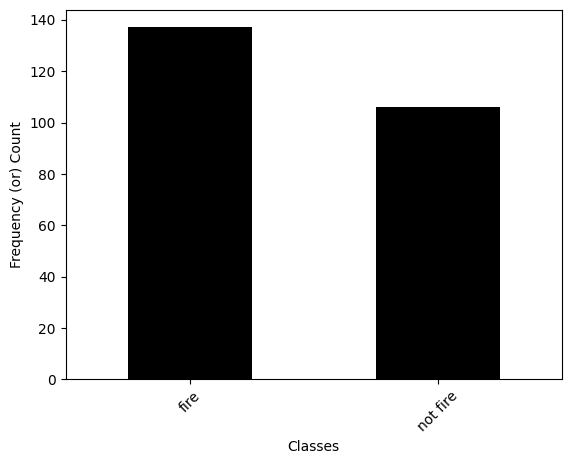

In [23]:
print(df["Classes"].value_counts())
df["Classes"].value_counts().plot(kind='bar',color='k')
plt.xticks(rotation=45)
plt.xlabel("Classes")
plt.ylabel("Frequency (or) Count")
plt.show()


---> Based On the above Observation The Dataset is Almost Balanced

In [24]:
df[num].describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391
std,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000
50%,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000
75%,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000


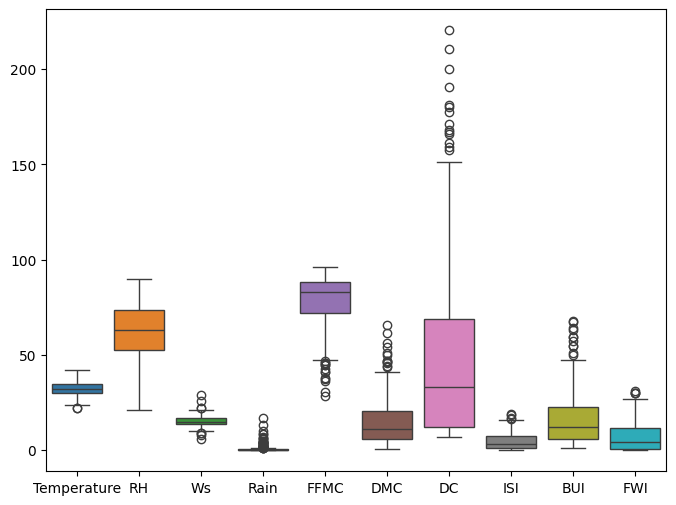

In [25]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df)
plt.show()


---> Except One or Two Columns Remaining all the Columns Consists of Outliers

---> There are so many number of outliers. When we Remove Outliers Huge amount of Data is deleted. Insted Of Deleting Replace the Values with Lower Bound That are Less than Lower Bound and Vice Versa

In [26]:
for col in num:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

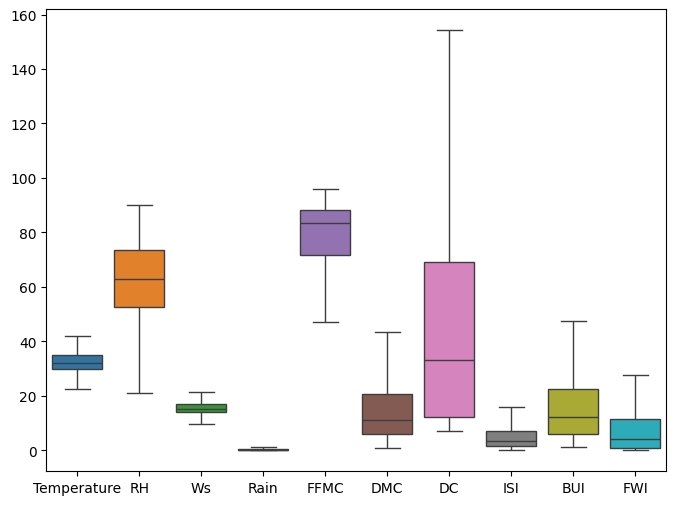

In [27]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df)
plt.show()

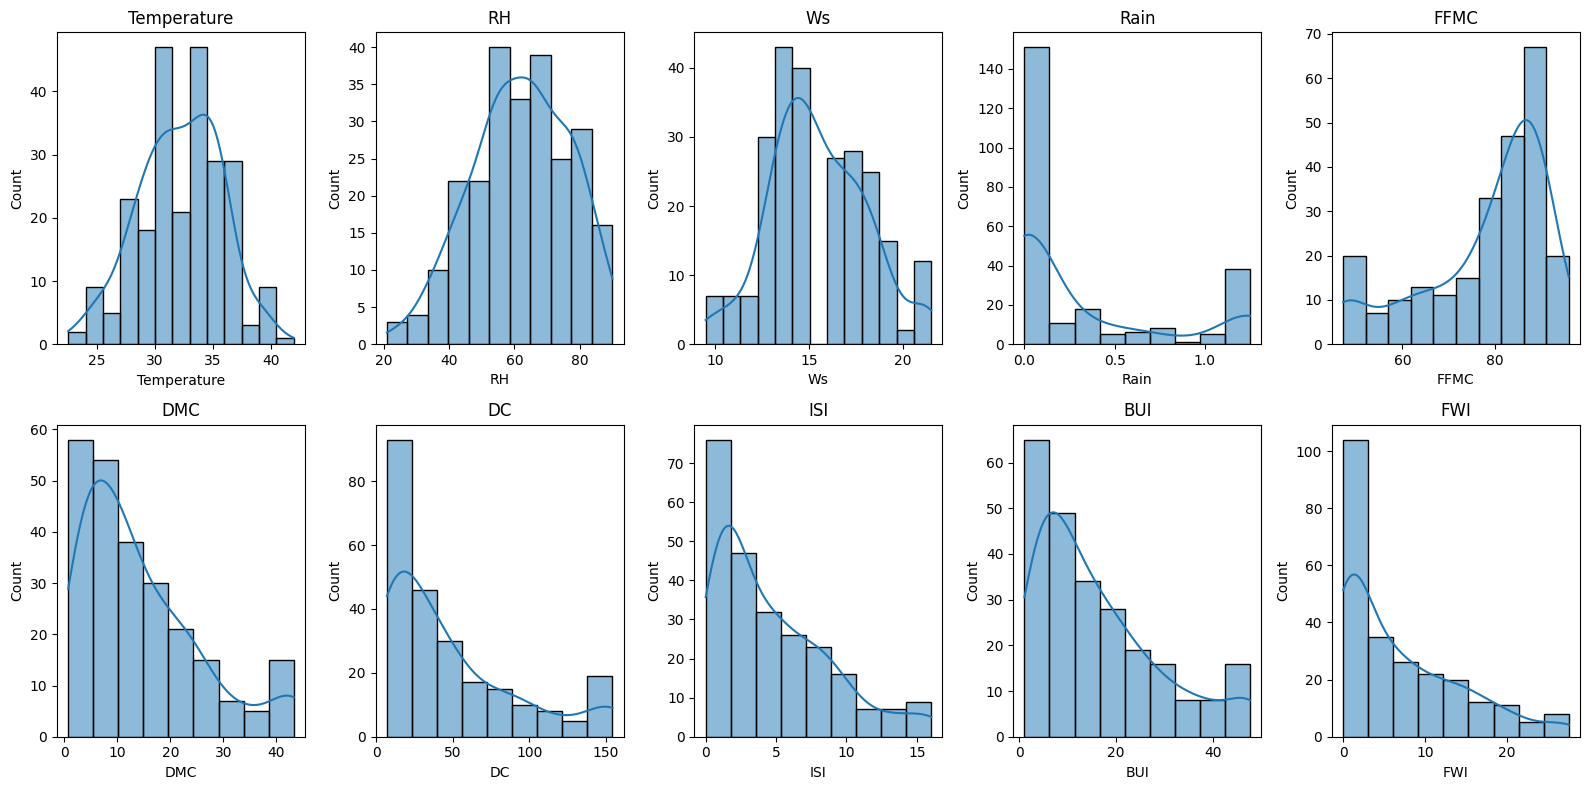

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 
                'DMC', 'DC', 'ISI', 'BUI', 'FWI']

plt.figure(figsize=(16, 8))

for i, col in enumerate(numeric_cols):
    ax = plt.subplot(2, 5, i + 1)  
    sns.histplot(data=df, x=col, kde=True, ax=ax) 
    ax.set_title(col) 

plt.tight_layout() 
plt.savefig('numeric_histograms.png')

---> The Numerical Columns are Distributed in Differnt Types Of Distributions Such as Normal, Right Skewed, Left Skewed etc.,


---> As Eariler the data consists of two regions Each Region Have 122 Columns Just Check it because we performing Cleaning on  the datset

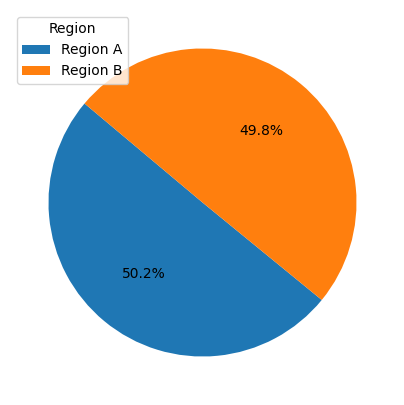

In [29]:
plt.figure(figsize=(5,5))
plt.pie(df['Region'].value_counts(),autopct='%1.1f%%', startangle=140)
plt.legend(title='Region', labels=['Region A', 'Region B'])
plt.show()

---> Because We dropped One Column that class label is not available

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler

In [31]:
x=df.drop(columns=['Classes'])
y=df["Classes"]

In [32]:
print(x.shape)
print(y.shape)


(243, 11)
(243,)


Note:---> After Splitting Only, Perform Transformations of Categorical Columns and Standardization to Prevent Data Leakage

In [33]:
df["Classes"].value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [35]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(194, 11)
(194,)
(49, 11)
(49,)


In [45]:
one=OneHotEncoder(sparse_output=False)
encoded_value=one.fit_transform(x_train["Region"].values.reshape(-1,1))
print(encoded_value)

[[0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 

In [47]:
print(one.categories_)


[array(['A', 'B'], dtype=object)]


In [50]:
encoded_df=pd.DataFrame(encoded_value,columns=one.get_feature_names_out(["Region"]))
print(encoded_df)

     Region_A  Region_B
0         0.0       1.0
1         0.0       1.0
2         1.0       0.0
3         0.0       1.0
4         1.0       0.0
..        ...       ...
189       0.0       1.0
190       0.0       1.0
191       0.0       1.0
192       1.0       0.0
193       1.0       0.0

[194 rows x 2 columns]


In [51]:
x_train.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
122,32.0,71.0,12.0,0.7,57.1,2.5,8.200,0.6,2.8,0.2,B
212,34.0,49.0,15.0,0.0,89.2,24.8,154.225,8.1,35.7,16.0,B
9,28.0,79.0,12.0,0.0,73.2,9.5,46.300,1.3,12.6,0.9,A
168,32.0,81.0,17.0,0.0,84.6,21.1,42.300,4.7,20.9,7.7,B
78,36.0,54.0,18.0,0.0,89.4,20.0,110.900,9.7,27.5,16.1,A


In [52]:
x_train.reset_index(drop=True,inplace=True)
encoded_df.reset_index(drop=True,inplace=True)

In [58]:
x_train_new=pd.concat([x_train.drop(columns=['Region']),encoded_df],axis=1)


In [59]:
x_train_new.T

,0,1,2,3,4,5,6,7,8,9,...,184,185,186,187,188,189,190,191,192,193
Temperature,32.0,34.000,28.0,32.0,36.0,34.0,26.00,31.0,32.0,35.0,...,33.0,30.0,36.00,28.0,28.00,34.00,34.0,38.0,29.00,32.0
RH,71.0,49.000,79.0,81.0,54.0,53.0,80.00,65.0,48.0,55.0,...,57.0,80.0,43.00,79.0,58.00,71.00,58.0,35.0,61.00,47.0
Ws,12.0,15.000,12.0,17.0,18.0,18.0,16.00,14.0,18.0,14.0,...,16.0,15.0,15.00,18.0,18.00,14.00,18.0,15.0,13.00,14.0
Rain,0.7,0.000,0.0,0.0,0.0,0.0,1.25,0.0,0.0,0.0,...,0.0,0.0,1.25,0.1,1.25,1.25,0.0,0.0,1.25,0.7
FFMC,57.1,89.200,73.2,84.6,89.4,89.0,47.40,84.5,91.5,88.9,...,87.5,83.1,82.30,73.4,63.70,64.50,88.0,93.8,64.40,77.5
DMC,2.5,24.800,9.5,21.1,20.0,21.6,2.90,12.5,43.3,18.6,...,15.7,7.9,9.40,16.4,3.20,3.30,13.6,23.0,4.10,7.1
DC,8.2,154.225,46.3,42.3,110.9,80.3,7.70,54.3,90.1,67.0,...,37.6,34.5,9.90,79.9,8.50,9.10,36.8,42.7,7.60,8.8
ISI,0.6,8.100,1.3,4.7,9.7,9.2,0.30,4.0,13.2,7.4,...,6.7,3.5,3.20,1.8,1.20,1.00,8.0,15.7,1.00,1.8
BUI,2.8,35.700,12.6,20.9,27.5,25.8,3.00,15.8,44.0,21.9,...,15.7,10.0,9.00,21.7,3.30,3.50,14.1,22.9,3.90,6.8
FWI,0.2,16.000,0.9,7.7,16.1,15.0,0.10,5.6,25.4,11.6,...,9.0,3.7,3.10,2.8,0.50,0.40,9.9,20.9,0.40,0.9


In [61]:
import pickle
with open("onehot.pkl","wb") as f:
    pickle.dump(one,f)

In [62]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train_new)

In [63]:
x_train_scaled

array([[-0.06932533,  0.59464223, -1.40427917, ..., -0.94069292,
        -1.01036297,  1.01036297],
       [ 0.50913118, -0.96141726, -0.21894128, ...,  1.2270415 ,
        -1.01036297,  1.01036297],
       [-1.22623835,  1.16048204, -1.40427917, ..., -0.84465405,
         0.98974332, -0.98974332],
       ...,
       [ 1.6660442 , -1.95163693, -0.21894128, ...,  1.89931357,
        -1.01036297,  1.01036297],
       [-0.93701009, -0.11265754, -1.00916654, ..., -0.91325324,
         0.98974332, -0.98974332],
       [-0.06932533, -1.10287721, -0.61405391, ..., -0.84465405,
         0.98974332, -0.98974332]], shape=(194, 12))

In [65]:
with open('scaler.pkl',"wb") as f:
    pickle.dump(scaler,f)

In [66]:
y_train

122    not fire
212        fire
9      not fire
168        fire
78         fire
         ...   
219    not fire
155        fire
186        fire
1      not fire
119    not fire
Name: Classes, Length: 194, dtype: object

In [67]:
label=LabelEncoder()
y_train_encoded=label.fit_transform(y_train)

---> 1 Represents NotFire

---> 0 Represents Fire

In [70]:
y_train_encoded

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1])

In [71]:
with open("labelencoder.pkl","wb") as f:
    pickle.dump(label,f)

In [72]:
from sklearn.decomposition import PCA

Number of components to explain 95% variance: 6


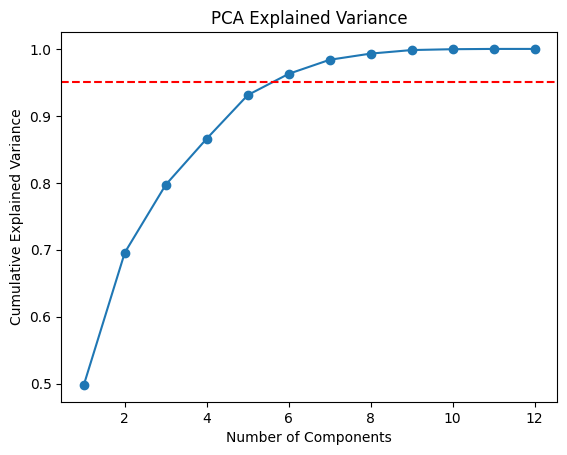

In [ ]:
pca = PCA()
pca.fit(x_train_scaled)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1

print(f"Number of components to explain 95% variance: {n_components_95}")
import matplotlib.pyplot as plt
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.show()

In [76]:
new_pca=PCA(n_components=6)

In [78]:
x_train_pca=new_pca.fit_transform(x_train_scaled)
print(x_train_pca)

[[-2.56836586 -1.99256076  0.0101254  -1.20018751  0.27568222  0.02283068]
 [ 3.40356036 -0.45475114  0.84899201 -0.6908229   0.12745446 -0.23945757]
 [-1.69588432  1.26229708 -1.0642392  -1.52770015 -0.9088161  -0.59401012]
 ...
 [ 3.8495583  -1.92062054 -0.56993097  1.49374149  0.1129495  -0.49142549]
 [-2.98627339  0.19798376 -0.96046617 -0.20092127  1.58053687 -1.02917027]
 [-1.55373702  0.04450703 -1.68846755  0.52398094  1.00436873 -0.41417487]]


In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.ensemble import BaggingClassifier

In [80]:
model=LogisticRegression(solver='saga', max_iter=1000, random_state=42)
ensemble_lr= BaggingClassifier(
    estimator=model,      
    n_estimators=50,      
    random_state=42,      
    n_jobs=-1             
)

In [81]:
ensemble_lr.fit(x_train_pca,y_train_encoded)

,estimator,LogisticRegre...solver='saga')
,n_estimators,50
,max_samples,1.0
,max_features,1.0
,bootstrap,True
,bootstrap_features,False
,oob_score,False
,warm_start,False
,n_jobs,-1
,random_state,42
,verbose,0


---> Evaluating the model on training data Later we perform evalation on Test data

In [82]:
x_train_predictions=ensemble_lr.predict(x_train_pca)

In [84]:
print("Training Accuracy:",accuracy_score(y_train_encoded,x_train_predictions))
print()
print("ClassificationReport:",classification_report(y_train_encoded,x_train_predictions))
print()
print("Confusion Matrix:\n",confusion_matrix(y_train_encoded,x_train_predictions))

Training Accuracy: 0.9381443298969072

ClassificationReport:               precision    recall  f1-score   support

           0       0.94      0.94      0.94       109
           1       0.93      0.93      0.93        85

    accuracy                           0.94       194
   macro avg       0.94      0.94      0.94       194
weighted avg       0.94      0.94      0.94       194


Confusion Matrix:
 [[103   6]
 [  6  79]]


----> Now we perform The Evaluation metrics on test data

In [86]:
x_test.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
226,29.0,49.0,19.0,0.0,88.6,11.5,33.4,9.100,12.4,10.300,B
195,35.0,34.0,16.0,0.2,88.3,16.9,45.1,7.500,17.5,10.500,B
96,29.0,75.0,16.0,0.0,80.8,3.4,24.0,2.800,5.1,1.700,A
172,36.0,29.0,18.0,0.0,93.9,39.6,80.6,16.025,39.5,27.575,B
75,36.0,55.0,13.0,0.3,82.4,15.6,92.5,3.700,22.0,6.300,A


In [87]:
x_test_encoded=one.transform(x_test["Region"].values.reshape(-1,1))
encoded_test_df=pd.DataFrame(x_test_encoded,columns=one.get_feature_names_out(["Region"]))
x_test_new=pd.concat([x_test.drop(columns=['Region']).reset_index(drop=True),encoded_test_df.reset_index(drop=True)],axis=1)

In [91]:
x_test_new.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region_A,Region_B
0,29.0,49.0,19.0,0.0,88.6,11.5,33.4,9.100,12.4,10.300,0.0,1.0
1,35.0,34.0,16.0,0.2,88.3,16.9,45.1,7.500,17.5,10.500,0.0,1.0
2,29.0,75.0,16.0,0.0,80.8,3.4,24.0,2.800,5.1,1.700,1.0,0.0
3,36.0,29.0,18.0,0.0,93.9,39.6,80.6,16.025,39.5,27.575,0.0,1.0
4,36.0,55.0,13.0,0.3,82.4,15.6,92.5,3.700,22.0,6.300,1.0,0.0


In [92]:
x_test_scaler=scaler.transform(x_test_new)

In [93]:
y_test_encoded=label.transform(y_test)

In [94]:
y_pred=ensemble_lr.predict(new_pca.transform(x_test_scaler))

In [98]:
print("Training Accuracy:",accuracy_score(y_test_encoded,y_pred))
print("ClassificationReport:\n",classification_report(y_test_encoded,y_pred))
print("ConfusionMatrix:\n",confusion_matrix(y_test_encoded,y_pred))

Training Accuracy: 0.9591836734693877
ClassificationReport:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        28
           1       0.95      0.95      0.95        21

    accuracy                           0.96        49
   macro avg       0.96      0.96      0.96        49
weighted avg       0.96      0.96      0.96        49

ConfusionMatrix:
 [[27  1]
 [ 1 20]]


In [99]:
with open("pca.pkl","wb") as f:
    pickle.dump(new_pca,f)

In [100]:
with open("model.pkl","wb") as f:
    pickle.dump(ensemble_lr,f)